# Brain Stroke Prediction

In [257]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [259]:
# load the data excel file to Dataframe
df = pd.read_excel(r"D:\\ajay\\python\\brainstroke.xlsx")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.60,formerly smoked,Yes
1,Male,80,No,Yes,Yes,Private,Rural,105.92,32.50,never smoked,Yes
2,Female,49,No,No,Yes,Private,Urban,171.23,34.40,smokes,Yes
3,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.00,never smoked,Yes
4,Male,81,No,No,Yes,Private,Urban,186.21,29.00,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41,No,No,No,Private,Rural,70.15,29.80,formerly smoked,No
4977,Male,40,No,No,Yes,Private,Urban,191.15,31.10,smokes,No
4978,Female,45,Yes,No,Yes,Govt_job,Rural,95.02,31.80,smokes,No
4979,Male,40,No,No,Yes,Private,Rural,83.94,30.00,smokes,No


### Basic Information about the data

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   int64  
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 428.2+ KB


In [261]:
# statistical summary of the data
df.describe()

,age,avg_glucose_level,bmi
count,4981.00,4981.00,4981.00
mean,43.42,105.94,28.50
std,22.66,45.08,6.79
min,0.00,55.12,14.00
25%,25.00,77.23,23.70
50%,45.00,91.85,28.10
75%,61.00,113.86,32.60
max,82.00,271.74,48.90


In [262]:
df.describe(include = 'O').T

,count,unique,top,freq
gender,4981,2,Female,2907
hypertension,4981,2,No,4502
heart_disease,4981,2,No,4706
ever_married,4981,2,Yes,3280
work_type,4981,4,Private,2860
Residence_type,4981,2,Urban,2532
smoking_status,4981,4,never smoked,1838
stroke,4981,2,No,4733


In [263]:
# DataTypes about the data
df.dtypes

gender                object
age                    int64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

### Data Cleaning 

In [264]:
# check the null values in the data
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are no null values in the data

In [265]:
# check the duplicates value of the data
df.duplicated().sum()

np.int64(0)

There are no duplicate values

In [266]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.60,formerly smoked,Yes
1,Male,80,No,Yes,Yes,Private,Rural,105.92,32.50,never smoked,Yes


## Data Exploration

In [267]:
df['stroke'].value_counts()

stroke
No     4733
Yes     248
Name: count, dtype: int64

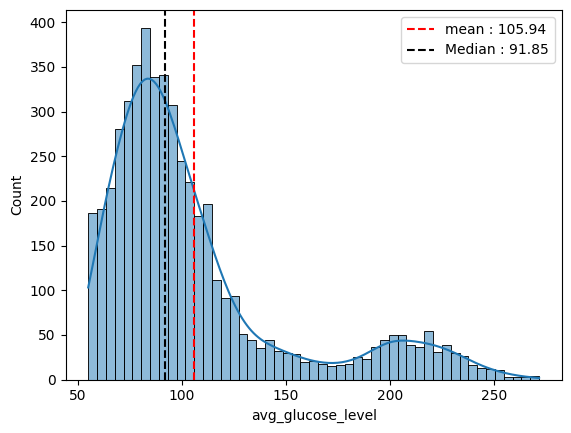

In [268]:
# avg clucose level of the data visual
sns.histplot(df['avg_glucose_level'],kde = True,)
plt.axvline(df['avg_glucose_level'].mean(),color = 'red',linestyle = '--',label =f"mean : {df['avg_glucose_level'].mean():.2f}")
plt.axvline(df['avg_glucose_level'].median(),color = 'black',linestyle = '--',label =f"Median : {df['avg_glucose_level'].median():.2f}")
plt.legend()

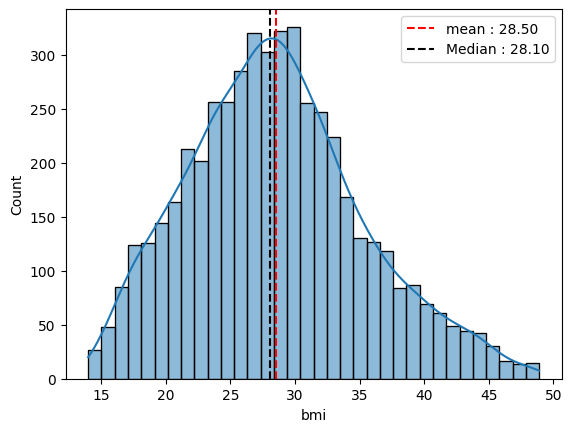

In [269]:
sns.histplot(df['bmi'],kde = True,)
plt.axvline(df['bmi'].mean(),color = 'red',linestyle = '--',label =f"mean : {df['bmi'].mean():.2f}")
plt.axvline(df['bmi'].median(),color = 'black',linestyle = '--',label =f"Median : {df['bmi'].median():.2f}")
plt.legend()

In [270]:
# group the value glucose level 
pd.set_option('display.float_format',lambda x : "%.2f"%x)
glucose_df = df.groupby(by = 'stroke',as_index = False)['avg_glucose_level'].mean()
glucose_df

,stroke,avg_glucose_level
0,No,104.57
1,Yes,132.18


In [271]:
bmi_df = df.groupby(by = 'stroke',as_index = False)['bmi'].mean()
bmi_df

,stroke,bmi
0,No,28.41
1,Yes,30.19


Text(0, 0.5, 'Glucose Level')

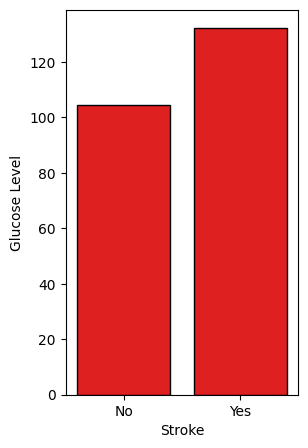

In [272]:
plt.figure(figsize = (3,5))
sns.barplot(x = 'stroke',y = 'avg_glucose_level',data = glucose_df,color = 'red',edgecolor = 'black')
plt.xlabel("Stroke")
plt.ylabel("Glucose Level")

In [273]:
bmi_df[bmi_df['stroke']=='No']['bmi']

0   28.41
Name: bmi, dtype: float64

Text(0, 0.5, 'BMI')

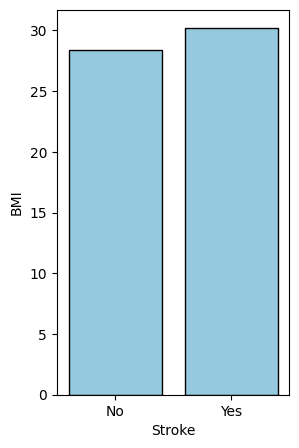

In [274]:
plt.figure(figsize = (3,5))
sns.barplot(x = 'stroke',y = 'bmi',data = bmi_df,color = 'skyblue',edgecolor = 'black')
plt.xlabel("Stroke")
plt.ylabel("BMI")

In [275]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.60,formerly smoked,Yes
1,Male,80,No,Yes,Yes,Private,Rural,105.92,32.50,never smoked,Yes
2,Female,49,No,No,Yes,Private,Urban,171.23,34.40,smokes,Yes
3,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.00,never smoked,Yes
4,Male,81,No,No,Yes,Private,Urban,186.21,29.00,formerly smoked,Yes


In [276]:
gender_df = df.groupby(['gender','stroke']).size().unstack(fill_value = 0)
gender_df

stroke,No,Yes
gender,,
Female,2767,140
Male,1966,108


In [277]:
age_df = df.groupby(by = 'stroke',as_index = False)['age'].mean()
age_df 

,stroke,age
0,No,42.14
1,Yes,67.82


## Data Visualization

Text(0, 0.5, 'Frequency')

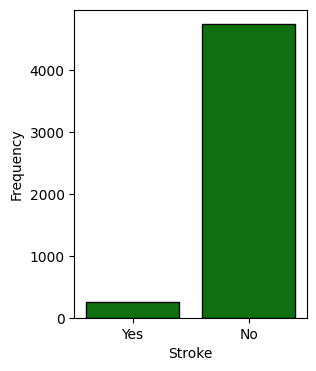

In [278]:
plt.figure(figsize = (3,4))
sns.countplot(x = df['stroke'],color = 'green',edgecolor = 'black')
plt.xlabel("Stroke")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

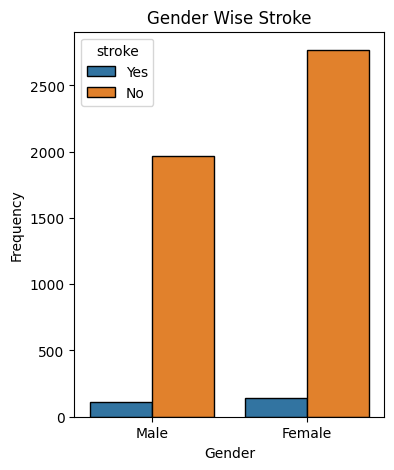

In [279]:
plt.figure(figsize = (4,5))
sns.countplot(x = df['gender'],hue = df['stroke'],edgecolor = 'black')
plt.title("Gender Wise Stroke")
plt.xlabel("Gender")
plt.ylabel("Frequency")

In [280]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.60,formerly smoked,Yes
1,Male,80,No,Yes,Yes,Private,Rural,105.92,32.50,never smoked,Yes


Text(0.5, 1.0, 'Heart Disease Wise Stroke')

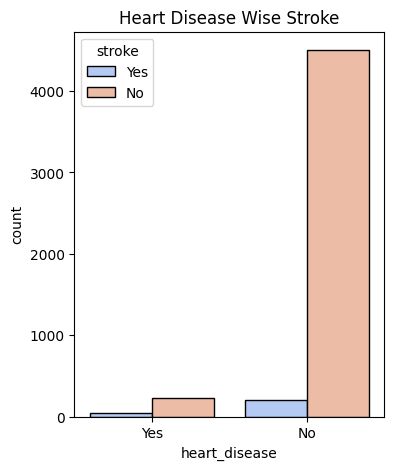

In [281]:
plt.figure(figsize = (4,5))
sns.countplot(x = df['heart_disease'],hue = df['stroke'],palette= 'coolwarm',edgecolor = 'black')
plt.title("Heart Disease Wise Stroke")

<Axes: xlabel='work_type', ylabel='count'>

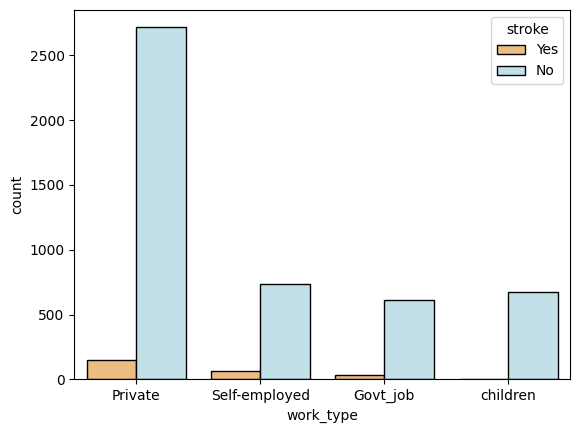

In [282]:
sns.countplot(x = df['work_type'],hue = df['stroke'],palette = 'RdYlBu',edgecolor = 'black')

In [283]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.60,formerly smoked,Yes
1,Male,80,No,Yes,Yes,Private,Rural,105.92,32.50,never smoked,Yes


Text(0.5, 1.0, 'Area Wise Stroke')

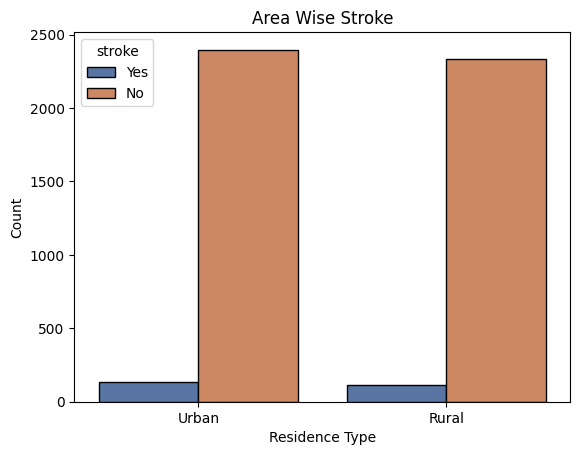

In [284]:
sns.countplot(x = df['Residence_type'],hue = df['stroke'],edgecolor = 'black',palette = 'deep')
plt.xlabel("Residence Type")
plt.ylabel("Count")
plt.title("Area Wise Stroke")

Text(0.5, 1.0, 'Average Glucose Level of Stroke')

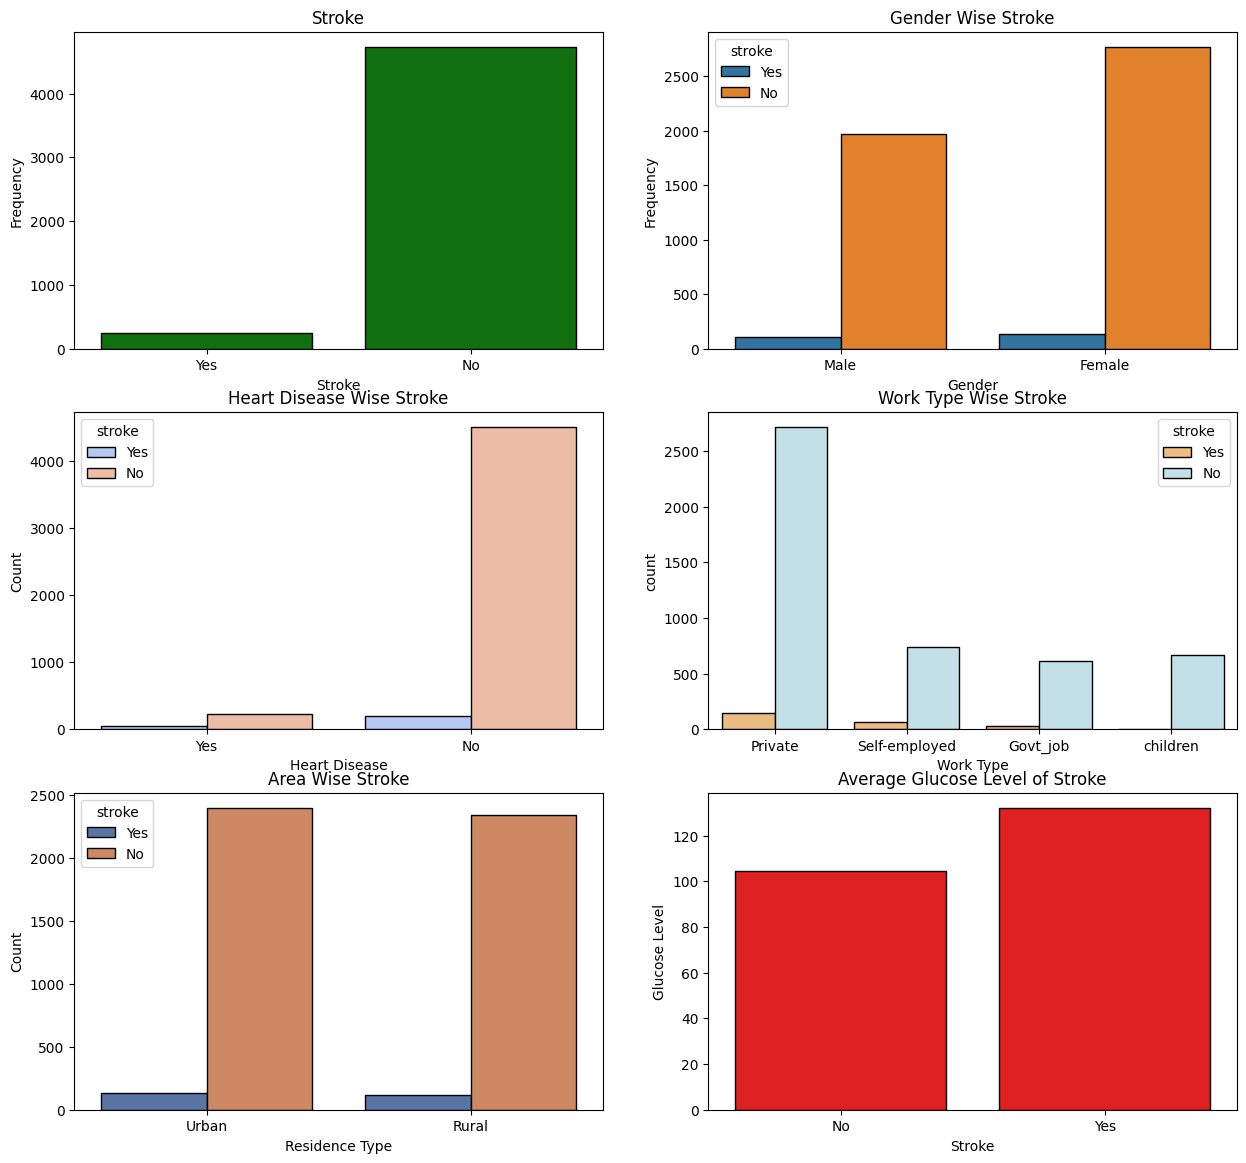

In [285]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 14))

# axis 0,0 plot
sns.countplot(x = df['stroke'],color = 'green',edgecolor = 'black',ax = axs[0][0])
axs[0][0].set_title("Stroke")
axs[0][0].set_xlabel("Stroke")
axs[0][0].set_ylabel("Frequency")


# axis 0 , 1 plot
sns.countplot(x = df['gender'],hue = df['stroke'],edgecolor = 'black',ax = axs[0][1])
axs[0][1].set_title("Gender Wise Stroke")
axs[0][1].set_xlabel("Gender")
axs[0][1].set_ylabel("Frequency")

# axis 1, 0 plot
sns.countplot(x = df['heart_disease'],hue = df['stroke'],palette= 'coolwarm',edgecolor = 'black',ax = axs[1][0])
axs[1][0].set_title("Heart Disease Wise Stroke")
axs[1][0].set_xlabel("Heart Disease")
axs[1][0].set_ylabel("Count")

# axis 1, 1 plot
sns.countplot(x = df['work_type'],hue = df['stroke'],palette = 'RdYlBu',edgecolor = 'black',ax = axs[1][1])
axs[1][1].set_title("Work Type Wise Stroke")
axs[1][1].set_xlabel("Work Type")

# axis 2,0 plot
sns.countplot(x = df['Residence_type'],hue = df['stroke'],edgecolor = 'black',palette = 'deep',ax = axs[2][0])
axs[2][0].set_xlabel("Residence Type")
axs[2][0].set_ylabel("Count")
axs[2][0].set_title("Area Wise Stroke")

# axis 2,1 plot
sns.barplot(x = 'stroke',y = 'avg_glucose_level',data = glucose_df,color = 'red',edgecolor = 'black',ax = axs[2][1])
axs[2][1].set_xlabel("Stroke")
axs[2][1].set_ylabel("Glucose Level")
axs[2][1].set_title("Average Glucose Level of Stroke")

In [286]:
len(df[(df['stroke']=='Yes')&(df['work_type']=='children')])

2

## Preprocessing

In [287]:
# Replace or Encode the data
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [288]:
df['hypertension'].unique()

array(['No', 'Yes'], dtype=object)

In [289]:
df['heart_disease'].unique()

array(['Yes', 'No'], dtype=object)

In [290]:
df.replace({'gender': {'Male':1,'Female':0},
            'hypertension':{'No':0,'Yes':1},
            'heart_disease':{'No':0,'Yes':1}},inplace = True)

C:\Users\91886\AppData\Local\Temp\ipykernel_9996\1008276778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender': {'Male':1,'Female':0},


#### Gender
Male - 1 , Female - 0
#### Hypertension 
Yes - 1 , No - 0
#### Heart_Disease 
Yes - 1 , No - 0

In [291]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,Yes
1,1,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,Yes


In [292]:
print("Marries Status : ",df['ever_married'].unique())
print("Work Type      : ",df['work_type'].unique())
print("Residence Type : ",df['Residence_type'].unique())

Marries Status :  ['Yes' 'No']
Work Type      :  ['Private' 'Self-employed' 'Govt_job' 'children']
Residence Type :  ['Urban' 'Rural']


In [293]:
# replace the value of column for Ever married and Residence type
df.replace({'ever_married':{'Yes':1,"No":0},
            "Residence_type":{'Rural':1,"Urban":0}},inplace = True)

C:\Users\91886\AppData\Local\Temp\ipykernel_9996\2100752780.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'ever_married':{'Yes':1,"No":0},


In [294]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,Private,0,228.69,36.60,formerly smoked,Yes
1,1,80,0,1,1,Private,1,105.92,32.50,never smoked,Yes


In [295]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [296]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [297]:
df.replace({'work_type':{'children':0,"Govt_job":1,"Self-employed":2,"Private":3},
            "smoking_status":{"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":3}},inplace = True)

C:\Users\91886\AppData\Local\Temp\ipykernel_9996\2155934414.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'work_type':{'children':0,"Govt_job":1,"Self-employed":2,"Private":3},


### Work Type
children - 0 , Govt_job - 1 , self_employed - 2 , private - 3
### smoking status
never smoked - 0 , formly smoked - 1 , smokes - 2 , unknown - 3

In [298]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,0,228.69,36.60,1,Yes
1,1,80,0,1,1,3,1,105.92,32.50,0,Yes


In [299]:
# encode the label columns
encoder = LabelEncoder()
encoder

LabelEncoder()

In [300]:
df['stroke'] = encoder.fit_transform(df['stroke'])

In [301]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,0,228.69,36.60,1,1
1,1,80,0,1,1,3,1,105.92,32.50,0,1


In [302]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [303]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,0,228.69,36.60,1,1
1,1,80,0,1,1,3,1,105.92,32.50,0,1
2,0,49,0,0,1,3,0,171.23,34.40,2,1
3,0,79,1,0,1,2,1,174.12,24.00,0,1
4,1,81,0,0,1,3,0,186.21,29.00,1,1


In [304]:
df.to_csv("D:\\ajay\\preprocess_brain_stroke.csv")

### Increase the count value of Yes Stroke Count

In [305]:
# split the value of 0 and 1 value
minor = df[df['stroke']==1]
major = df[df['stroke']==0]

In [306]:
print("Major : ",len(major))
print("Minor : ",len(minor))

Major :  4733
Minor :  248


In [307]:
# upsample the minor
upsampled_data = minor.sample(len(major),replace=True)
upsampled_data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4789,1,78,1,0,1,3,0,75.32,29.10,1,1
15,0,60,0,0,0,3,0,89.22,37.80,0,1


In [308]:
print(len(upsampled_data))
print(len(major))

4733
4733


In [309]:
# concatenation two dataframe
dframe = pd.concat([major,upsampled_data],axis = 0)
dframe['stroke'].value_counts()

stroke
0    4733
1    4733
Name: count, dtype: int64

In [310]:
dframe.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
208,1,3,0,0,0,0,1,95.12,18.00,3,0
209,1,58,1,0,1,3,0,87.96,39.20,0,0
210,0,8,0,0,0,3,0,110.89,17.60,3,0


#### Standardized the value of glucose level and bmi

In [311]:
dframe.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
208,1,3,0,0,0,0,1,95.12,18.00,3,0
209,1,58,1,0,1,3,0,87.96,39.20,0,0
210,0,8,0,0,0,3,0,110.89,17.60,3,0


In [312]:
#split x and y
x = dframe.drop(columns = 'stroke',axis = 1)
y = dframe['stroke']

In [313]:
print(x)
print(y)

     gender  age  hypertension  heart_disease  ever_married  work_type  \
208       1    3             0              0             0          0   
209       1   58             1              0             1          3   
210       0    8             0              0             0          3   
211       0   70             0              0             1          3   
212       0   52             0              0             1          3   
..      ...  ...           ...            ...           ...        ...   
194       1   78             0              0             1          2   
87        0   57             0              0             1          1   
57        0   67             1              0             1          3   
84        0   77             0              0             1          1   
28        1   48             0              0             0          1   

     Residence_type  avg_glucose_level   bmi  smoking_status  
208               1              95.12 18.00    

### Split train test data

In [314]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.25,stratify=y)

In [315]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(9466, 10) (7099, 10) (2367, 10)
(9466,) (7099,) (2367,)


## Find Machine Learning Model

In [316]:
# import machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [317]:
# import the classification metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [318]:
# find the best algorithm
models = {
    'Logistic Regression':LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "Support vector machine":SVC(),
    "Naive Bayas":GaussianNB()
}

In [319]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # training the model
    model.fit(x_train,y_train)
    
    # predict training data
    train_data_pred = model.predict(x_train)
    
     # test data prediction
    test_data_pred = model.predict(x_test)
    
    # accuracy score on the train and test
    print("Training Data : ",list(models.keys())[i])
    print("Accuracy Score : ",accuracy_score(train_data_pred,y_train))
    print("F1 Score : ",f1_score(train_data_pred,y_train))
    print("Precision Score : ",precision_score(train_data_pred,y_train))
    print("Recall Score : ",recall_score(train_data_pred,y_train))
    
    print("--------------------------------------------------------------------------")
    print("Test data : ",list(models.keys())[i])
    print("Accuracy Score : ",accuracy_score(test_data_pred,y_test))
    print("F1 Score : ",f1_score(test_data_pred,y_test))
    print("Precision Score : ",precision_score(test_data_pred,y_test))
    print("Recall Score : ",recall_score(test_data_pred,y_test))
    
    print("----------------------------------------------------------------------------")
   

Training Data :  Logistic Regression
Accuracy Score :  0.7646147344696436
F1 Score :  0.7776447105788423
Precision Score :  0.8230985915492958
Recall Score :  0.7369482976040354
--------------------------------------------------------------------------
Test data :  Logistic Regression
Accuracy Score :  0.7735530207013097
F1 Score :  0.7862838915470495
Precision Score :  0.8334742180896028
Recall Score :  0.7441509433962264
----------------------------------------------------------------------------


c:\Users\91886\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Data :  Decision Tree
Accuracy Score :  1.0
F1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0
--------------------------------------------------------------------------
Test data :  Decision Tree
Accuracy Score :  0.9742289818335446
F1 Score :  0.9748660898228265
Precision Score :  1.0
Recall Score :  0.9509646302250804
----------------------------------------------------------------------------
Training Data :  Random Forest
Accuracy Score :  1.0
F1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0
--------------------------------------------------------------------------
Test data :  Random Forest
Accuracy Score :  0.991128010139417
F1 Score :  0.9912023460410557
Precision Score :  1.0
Recall Score :  0.9825581395348837
----------------------------------------------------------------------------
Training Data :  KNN
Accuracy Score :  0.9475982532751092
F1 Score :  0.9502141327623126
Precision Score :  1.0
Recall Score :  0.9051504334523203
--------------------

## KNN perform well

In [320]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [321]:
params =  {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [322]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [323]:
grid = GridSearchCV(knn,param_grid=params,cv = 5,n_jobs=-1)
grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [324]:
grid.fit(x_train,y_train)

c:\Users\91886\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [325]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [326]:
kn = KNeighborsClassifier(metric='euclidean',n_neighbors=3,weights = 'uniform')
kn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [327]:
model = kn.fit(x_train,y_train)
model

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [328]:
# train data prediction
train_data_prediction = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_prediction,y_train)

In [329]:
print("Train Data Accuracy Score : ",train_data_accuracy)

Train Data Accuracy Score :  0.9705592336948866


In [330]:
# test data prediction
test_data_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_prediction,y_test)

In [331]:
print("Test Data Accuracy Score : ",test_data_accuracy)

Test Data Accuracy Score :  0.9404309252217997


In [334]:
x_value = [[1,22,0,0,0,0,1,67.6,45.7,3]]
model.predict(x_value)

c:\Users\91886\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [333]:
# save the file 
import joblib

joblib.dump(model,"D:\\ajay\\python\\brain_stroke_model.pkl")

['D:\\ajay\\python\\brain_stroke_model.pkl']

In [336]:
df[df['stroke']==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,0,228.69,36.60,1,1
1,1,80,0,1,1,3,1,105.92,32.50,0,1
2,0,49,0,0,1,3,0,171.23,34.40,2,1
3,0,79,1,0,1,2,1,174.12,24.00,0,1
4,1,81,0,0,1,3,0,186.21,29.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4815,1,79,0,0,1,3,1,114.77,27.20,1,1
4816,1,74,0,0,1,3,0,167.13,28.70,3,1
4817,0,76,1,1,1,2,0,199.86,31.70,2,1
4818,1,74,0,0,1,2,1,60.98,28.10,0,1
